# FACE MASK DETECTION !

# IMPORT LIBRARIES !


In [26]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras.backend as k
from tensorflow.keras.layers import Conv2D,MaxPooling2D,SpatialDropout2D,Flatten,Dropout,Dense
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
import cv2
import datetime

# BUILDING MODEL TO CLASSIFY B/W MASK AND NO MASK

In [7]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D() )
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D() )
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D() )
model.add(Flatten())
model.add(Dense(100,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
        'train',
        target_size=(150,150),
        batch_size=16 ,
        class_mode='binary')

test_set = test_datagen.flow_from_directory(
        'test',
        target_size=(150,150),
        batch_size=16,
        class_mode='binary')

model_saved=model.fit_generator(
        training_set,
        epochs=10,
        validation_data=test_set,

        )
model.save('mymodel.h5',model_saved)

Found 1314 images belonging to 2 classes.
Found 194 images belonging to 2 classes.
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
83/83 [==============================] - 57s 683ms/step - loss: 0.3984 - accuracy: 0.8181 - val_loss: 0.1701 - val_accuracy: 0.9381
Epoch 2/10
83/83 [==============================] - 44s 530ms/step - loss: 0.1486 - accuracy: 0.9406 - val_loss: 0.1106 - val_accuracy: 0.9536
Epoch 3/10
83/83 [==============================] - 45s 539ms/step - loss: 0.1200 - accuracy: 0.9612 - val_loss: 0.2354 - val_accuracy: 0.9021
Epoch 4/10
83/83 [==============================] - 45s 538ms/step - loss: 0.1103 - accuracy: 0.9619 - val_loss: 0.0838 - val_accuracy: 0.9588
Epoch 5/10
83/83 [==============================] - 44s 527ms/step - loss: 0.0799 - accuracy: 0.9734 - val_loss: 0.1048 - val_accuracy: 0.9536
Epoch 6/10
83/83 [==============================] - 44s 536ms/step - loss: 0.0782 - accuracy: 0.9696 - val_loss: 0.1494 - val_

# To test for individual images

In [14]:
mymodel=load_model('mymodel.h5')
test_image=image.load_img(r'C:/Users/sujay/Downloads/FaceMaskDetector-master/FaceMaskDetector-master/test/with_mask/1-with-mask.jpg',
                          target_size=(150,150,3))
test_image
test_image=image.img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
mymodel.predict(test_image)[0][0]

0.0

In [11]:
pwd

'C:\\Users\\sujay\\Downloads\\FaceMaskDetector-master\\FaceMaskDetector-master'

# IMPLEMENTING LIVE DETECTION OF FACE MASK

In [15]:
mymodel=load_model('mymodel.h5')

cap=cv2.VideoCapture(0)
face_cascade=cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

while cap.isOpened():
    _,img=cap.read()
    face=face_cascade.detectMultiScale(img,scaleFactor=1.1,minNeighbors=4)
    for(x,y,w,h) in face:
        face_img = img[y:y+h, x:x+w]
        cv2.imwrite('temp.jpg',face_img)
        test_image=image.load_img('temp.jpg',target_size=(150,150,3))
        test_image=image.img_to_array(test_image)
        test_image=np.expand_dims(test_image,axis=0)
        pred=mymodel.predict(test_image)[0][0]
        if pred==1:
            cv2.rectangle(img,(x,y),(x+w,y+h),(0,0,255),3)
            cv2.putText(img,'NO MASK',((x+w)//2,y+h+20),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,255),3)
        else:
            cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),3)
            cv2.putText(img,'MASK',((x+w)//2,y+h+20),cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),3)
        datet=str(datetime.datetime.now())
        cv2.putText(img,datet,(400,450),cv2.FONT_HERSHEY_SIMPLEX,0.5,(255,255,255),1)
          
    cv2.imshow('img',img)
    
    if cv2.waitKey(1)==ord('q'): #press q to quit the video
        break
    
cap.release()
cv2.destroyAllWindows()


# lets see the output of code (Screen shot)!

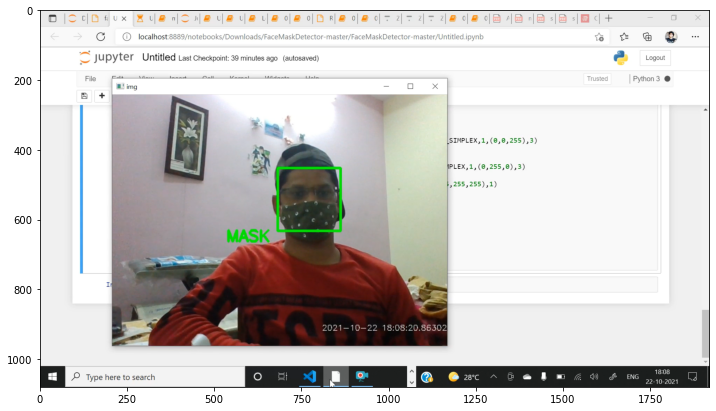

In [23]:
import matplotlib.pyplot as plt
img = cv2.imread('Screenshot (1976).png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(12,10))
plt.imshow(img)    #.....with mask

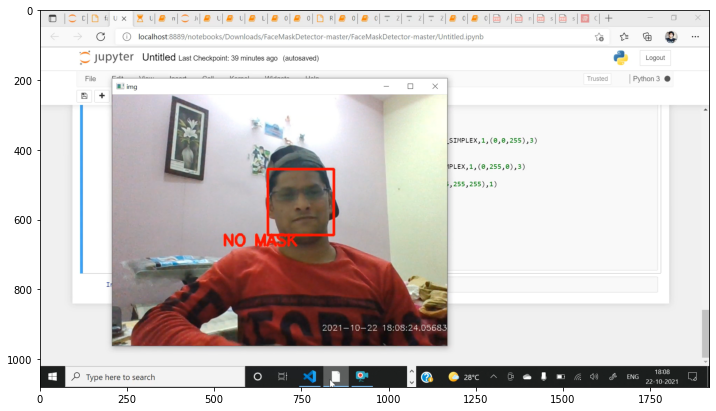

In [24]:
import matplotlib.pyplot as plt
img = cv2.imread('Screenshot (1977).png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(12,10))
plt.imshow(img)   #...without mask !